___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
x_train[5].shape

(28, 28)

In [6]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
y_train[0]

9

In [10]:
classes[y_train[0]]

'Ankle boot'

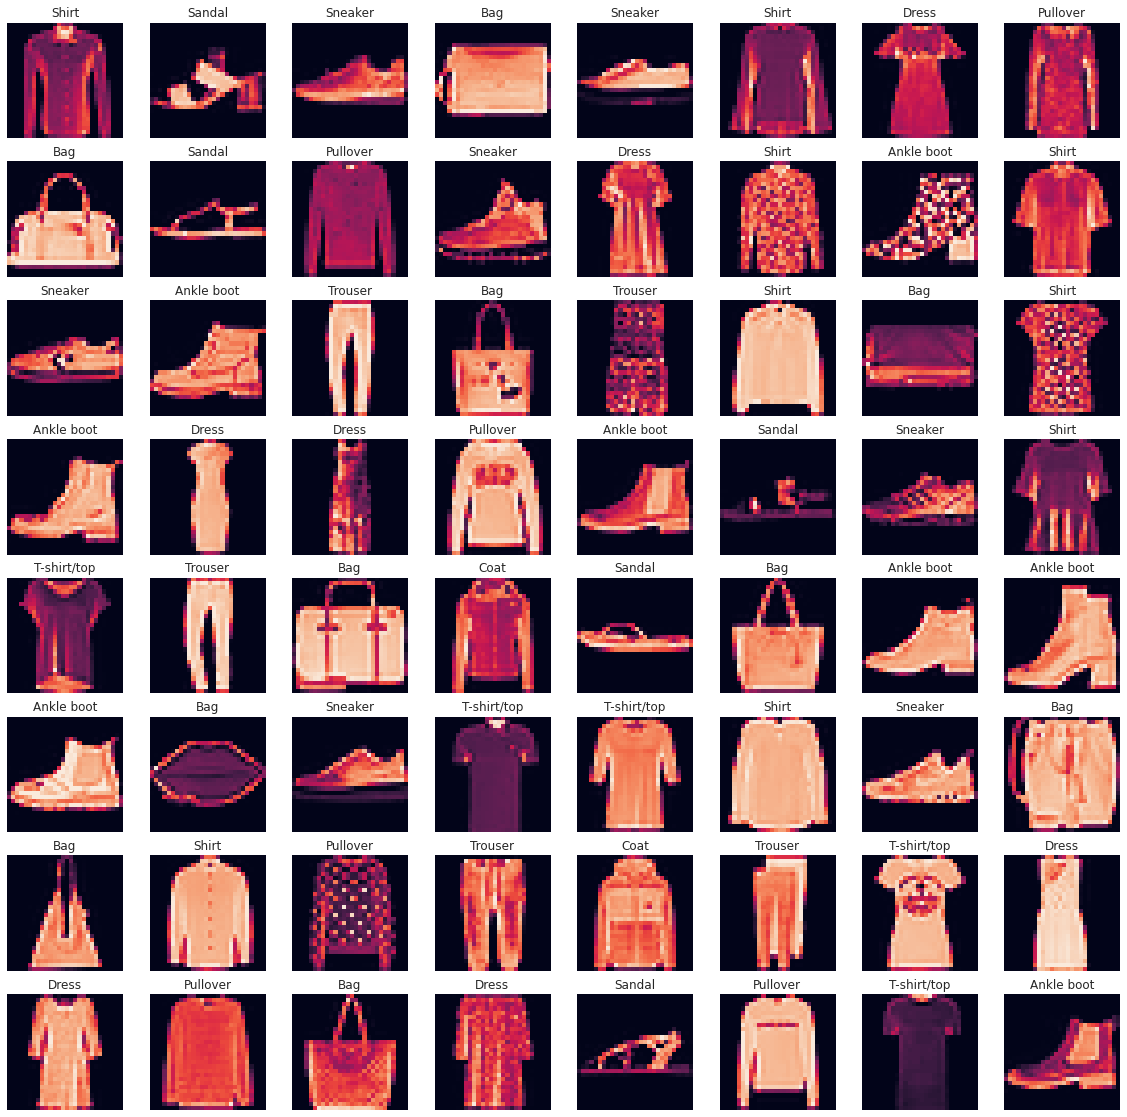

In [11]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

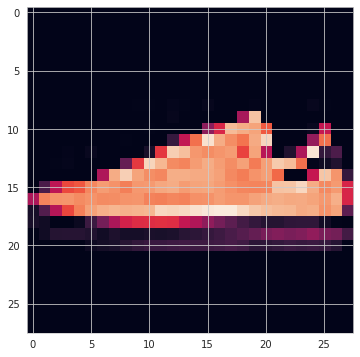

In [12]:
plt.imshow(x_train[6]);

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
x_train[5].min()

0

In [14]:
x_train[5].max()

255

In [16]:
# Normalize image pixels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [17]:
x_train[5].min()

0.0

In [18]:
x_train[5].max()

0.003921569

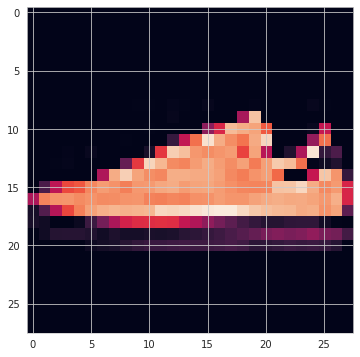

In [19]:
plt.imshow(x_train[6]);

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
x_train[6].shape

(28, 28)

In [21]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [23]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

In [27]:
y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
y_train[8].shape

(10,)

In [30]:
y_train.shape

(60000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))  #stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [36]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test),callbacks=[early_stop]) 


Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 1.0392 - accuracy: 0.6384 - val_loss: 0.6686 - val_accuracy: 0.7450
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.5956 - accuracy: 0.7769 - val_loss: 0.5750 - val_accuracy: 0.7875
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.5158 - accuracy: 0.8109 - val_loss: 0.5127 - val_accuracy: 0.8134
Epoch 4/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.4669 - accuracy: 0.8311 - val_loss: 0.4732 - val_accuracy: 0.8317
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4351 - accuracy: 0.8436 - val_loss: 0.4502 - val_accuracy: 0.8382
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4128 - accuracy: 0.8524 - val_loss: 0.4232 - val_accuracy: 0.8462
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3964 - accuracy: 0.8566 - val_loss: 0.4363 -

In [37]:
summary = pd.DataFrame(model.history.history)

**TASK 7: Plot values of metrics you used in your model.**

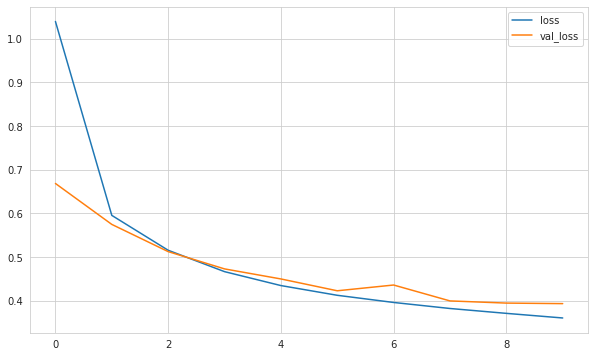

In [38]:
summary[["loss", "val_loss"]].plot();

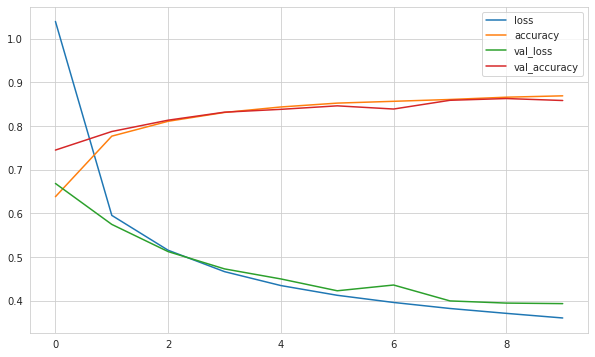

In [39]:
summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3938 - accuracy: 0.8584


[0.39378821849823, 0.8583999872207642]

In [42]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.39378821849823
Test accuracy: 0.8583999872207642


In [43]:
pred_prob = model.predict(x_test)
pred_prob

array([[8.0730936e-11, 3.7736817e-13, 2.6592029e-12, ..., 5.5817191e-02,
        4.7693288e-04, 9.2198622e-01],
       [2.7184887e-04, 7.6397242e-07, 9.7596335e-01, ..., 3.7928506e-12,
        1.9332949e-05, 3.8354618e-11],
       [7.8746321e-05, 9.9988067e-01, 1.6621058e-07, ..., 2.3584400e-08,
        2.4267928e-08, 1.1416644e-15],
       ...,
       [1.5102832e-03, 1.1016212e-09, 1.4980435e-05, ..., 1.6154779e-07,
        9.9678469e-01, 3.8165821e-10],
       [2.1413587e-06, 9.9926263e-01, 4.4304741e-08, ..., 4.6117815e-08,
        2.4528612e-08, 1.5109348e-10],
       [1.4741147e-06, 2.2251814e-07, 4.5875203e-07, ..., 8.6000234e-02,
        3.8978349e-02, 3.8431559e-04]], dtype=float32)

In [44]:
pred_prob.shape

(10000, 10)

In [45]:
pred_prob[0]

array([8.0730936e-11, 3.7736817e-13, 2.6592029e-12, 5.5419536e-10,
       4.2910342e-10, 2.1719638e-02, 4.1148676e-09, 5.5817191e-02,
       4.7693288e-04, 9.2198622e-01], dtype=float32)

In [46]:
np.argmax(pred_prob[0])

9

In [47]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
y_pred.shape

(10000,)

In [50]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test),axis=1)
print('classification_report')
print(classification_report(y_test_arg, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.84      0.67      0.74      1000
           3       0.87      0.88      0.87      1000
           4       0.72      0.83      0.77      1000
           5       0.97      0.93      0.95      1000
           6       0.61      0.65      0.63      1000
           7       0.93      0.93      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.92      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [52]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[816   1   9  29   4   1 129   0  11   0]
 [  2 956   3  25   5   0   9   0   0   0]
 [ 13   0 669   9 180   0 124   0   5   0]
 [ 25   9   2 878  36   0  47   0   3   0]
 [  0   1  52  32 828   1  84   0   2   0]
 [  0   0   0   1   0 927   1  41   3  27]
 [145   1  58  28  96   0 650   0  22   0]
 [  0   0   0   0   0  15   0 932   0  53]
 [  0   1   5   5   5   3  15   5 961   0]
 [  0   0   0   0   0   4   0  29   0 967]]


In [54]:
y_test != y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


True

## Prediction

In [58]:
my_num = x_test[6]

In [59]:
my_num.shape

(28, 28, 1)

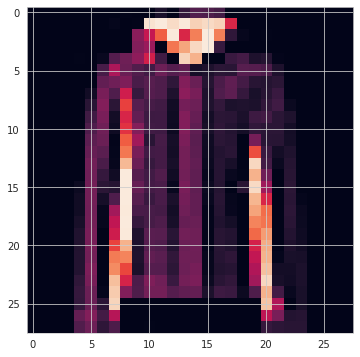

In [60]:
plt.imshow(my_num.reshape(28,28));

In [61]:
pred_prob = model.predict(my_num.reshape(1,28,28,1))
pred_prob

array([[2.1058789e-03, 1.9947693e-04, 4.3687966e-02, 6.1495363e-04,
        9.0571046e-01, 5.6157862e-08, 4.7506854e-02, 1.5199364e-11,
        1.7434613e-04, 6.3107275e-14]], dtype=float32)

In [62]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

4

In [63]:
model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___